In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('books.csv',error_bad_lines = False)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-1977,Brown Son & Ferguson Ltd.
1,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999,Huntington House Publishers
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004,Cold Spring Press
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004,Harvard University Press
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA,NaN


In [2]:
df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
num_pages                 0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64

In [3]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


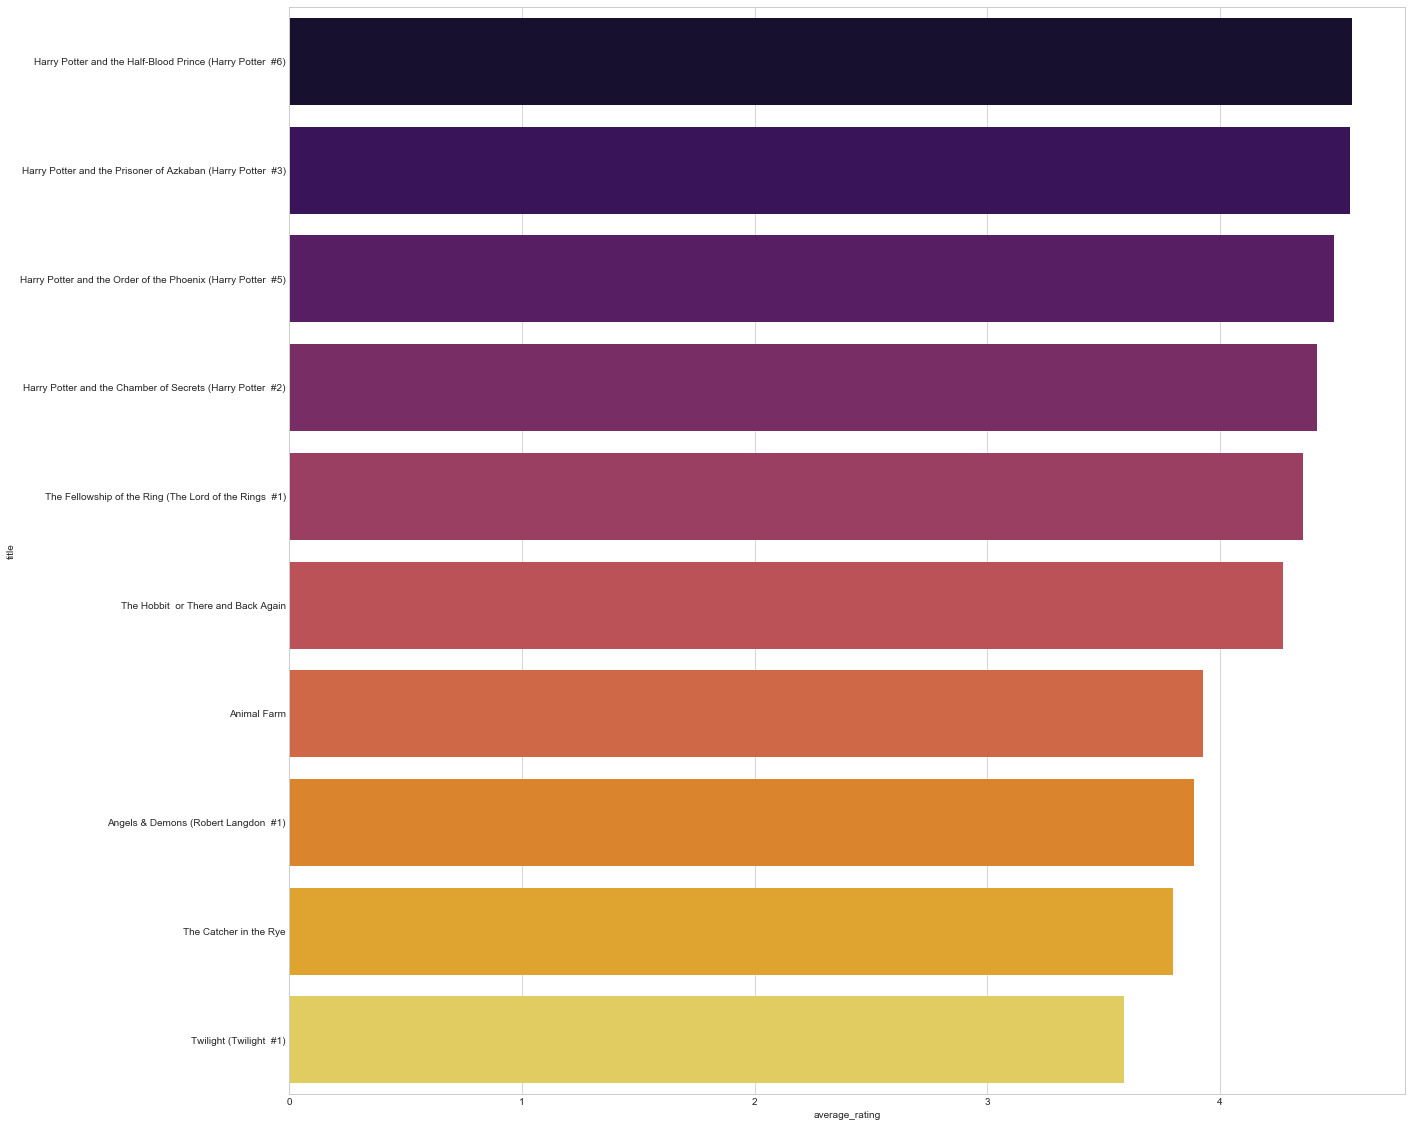

In [4]:
top_ten=df[df['ratings_count']>1000000]
top_ten=top_ten.sort_values(by='ratings_count', ascending=False).head(10)
top_ten_rating=top_ten.sort_values(by='average_rating', ascending=False)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,20))
sns.barplot(x="average_rating", y="title", data=top_ten_rating, palette='inferno')

In [5]:
book_aut=df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
book_aut

,title
authors,
P.G. Wodehouse,40
Stephen King,40
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28


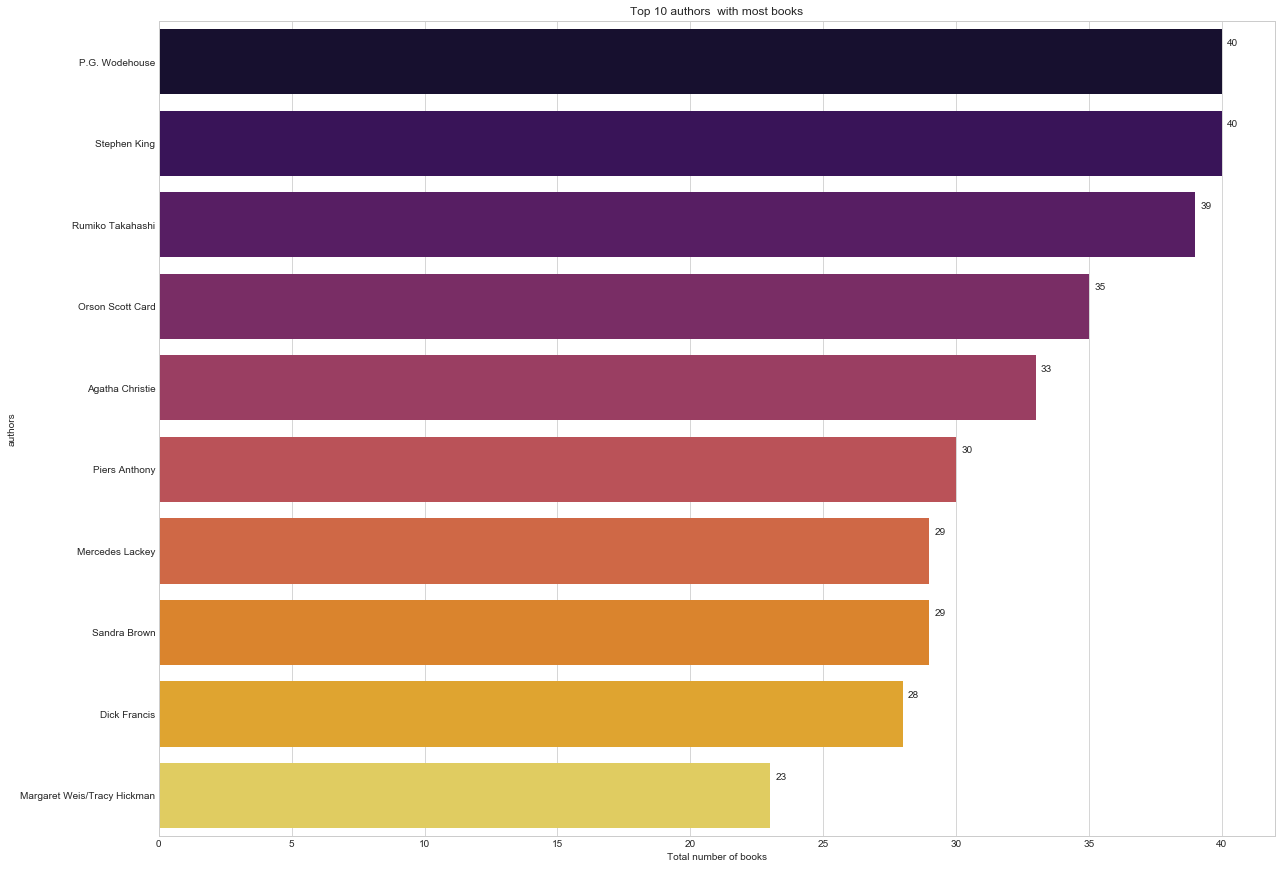

In [6]:
plt.figure(figsize=(20,15))
ax=sns.barplot(book_aut['title'], book_aut.index, palette='inferno')
ax.set_title("Top 10 authors  with most books")
ax.set_xlabel("Total number of books")

total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))

plt.show()

In [7]:
df=df.sort_values('average_rating').reset_index()
df=df.iloc[4:]
df

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
4,11103,1302,Juiced Official Strategy Guide,Doug Walsh,0,744005612,9.78E+12,eng,112,0,0,06-01-2005,BradyGames,NaN
5,11104,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0,189044717X,9.78E+12,eng,200,0,0,10/13/2000,Grove Press Open City Books,NaN
6,11105,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0,1932206108,9.78E+12,eng,228,0,0,01-01-2004,Frederick P. Lenz Foundation for American Budd...,NaN
7,11106,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0,1932206086,9.78E+12,eng,304,0,0,01-01-2003,Frederick P. Lenz Foundation for American Budd...,NaN
8,11107,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0,8644101277,9.79E+12,srp,222,0,0,01-01-1996,"Izdavačka agencija ""Draganić""",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,21,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5,786845031,9.78E+12,eng,24,2,1,02-01-2003,Disney Press,NaN
11123,23,39580,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5,089096940X,9.78E+12,eng,314,0,0,05-01-2000,Texas A&M University Press,NaN
11124,24,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5,1590529626,9.78E+12,eng,240,2,0,10/16/2007,Multnomah,NaN
11125,13,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5,563388323,9.78E+12,eng,2,2,0,10-02-1995,BBC Physical Audio,NaN


Text(0.5, 0, 'average rating')

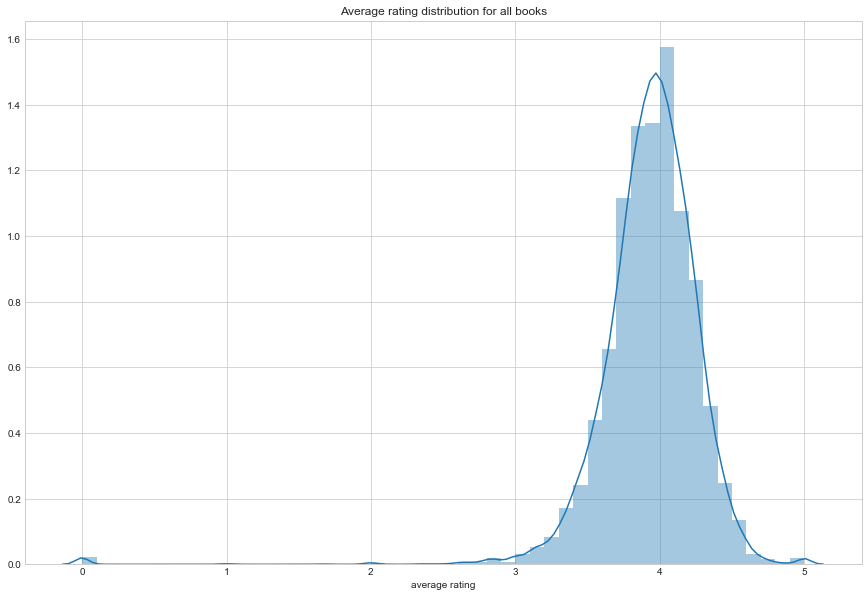

In [8]:
df.average_rating=df.average_rating.astype(float)
fig, ax= plt.subplots(figsize=[15,10])

sns.distplot(df['average_rating'], ax=ax)
ax.set_title('Average rating distribution for all books')
ax.set_xlabel('average rating')

In [9]:
df.head()

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
4,11103,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,744005612,9.78E+12,eng,112,0,0,06-01-2005,BradyGames,NaN
5,11104,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9.78E+12,eng,200,0,0,10/13/2000,Grove Press Open City Books,NaN
6,11105,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9.78E+12,eng,228,0,0,01-01-2004,Frederick P. Lenz Foundation for American Budd...,NaN
7,11106,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9.78E+12,eng,304,0,0,01-01-2003,Frederick P. Lenz Foundation for American Budd...,NaN
8,11107,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,8644101277,9.79E+12,srp,222,0,0,01-01-1996,"Izdavačka agencija ""Draganić""",NaN


In [10]:
df.tail(10)

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
11117,16,23276,Taxation of Mineral Rents,Ross Garnaut,5.0,198284543,9.78E+12,eng,350,1,0,11/17/1983,Oxford University Press USA,NaN
11118,17,23552,The New Big Book of America,Todd Davis/Marc Frey,5.0,762412631,9.78E+12,eng,56,2,1,3/21/2002,Courage Books,NaN
11119,18,25426,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans/Rhonda Evans,5.0,862431352,9.78E+12,wel,150,1,0,6/22/1987,Y Lolfa,NaN
11120,19,32823,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,5.0,310249872,9.78E+12,eng,336,1,1,6/17/2003,Zondervan,NaN
11121,20,36492,Oliver Wendell Holmes in Paris: Medicine Theo...,William C. Dowling,5.0,1584655801,9.78E+12,eng,179,1,1,2/28/2007,University Press of New England,NaN
11122,21,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5.0,786845031,9.78E+12,eng,24,2,1,02-01-2003,Disney Press,NaN
11123,23,39580,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5.0,089096940X,9.78E+12,eng,314,0,0,05-01-2000,Texas A&M University Press,NaN
11124,24,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0,1590529626,9.78E+12,eng,240,2,0,10/16/2007,Multnomah,NaN
11125,13,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,563388323,9.78E+12,eng,2,2,0,10-02-1995,BBC Physical Audio,NaN
11126,22,38804,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.0,1930901356,9.78E+12,eng,222,1,0,7/25/2003,Academica Press,NaN


In [11]:
df=df.sort_values('num_pages', ascending=False).reset_index()
df=df.iloc[4:]
df.head(10)

,level_0,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
4,6562,4499,16619,Democracy in America,Alexis de Tocqueville/Isaac Kramnick/Gerald Bevan,4.02,140447601,9.78E+12,eng,992,18925,523,4/24/2003,Penguin Classics,NaN
5,10327,837,28389,Marcel Proust: A Life,William C. Carter,4.33,300094000,9.78E+12,eng,992,14,4,02-08-2002,Yale University Press,NaN
6,10719,438,19809,The Last Lion: Winston Spencer Churchill: Visi...,William Manchester,4.42,385313489,9.78E+12,eng,992,9659,467,04-01-1984,Delta,NaN
7,10715,437,19808,The Last Lion: Winston Spencer Churchill: Visi...,William Manchester,4.42,316545031,9.78E+12,en-US,992,335,38,5/30/1983,Little Brown & Company,NaN
8,7026,4039,19670,Debt of Honor (Jack Ryan #7),Tom Clancy,4.05,425147584,9.78E+12,eng,990,39521,469,08-01-1995,Berkley Books,NaN
9,893,10253,34307,Aches & Pains,Maeve Binchy/Wendy Shea,3.53,385335105,9.78E+12,en-US,99,356,30,6/13/2000,Delacorte Press,NaN
10,5249,5813,7015,A Midsummer Night's Dream,William Shakespeare/Roma Gill,3.94,198320213,9.78E+12,eng,99,14,3,8/15/2002,Oxford University Press USA,NaN
11,10138,1028,31580,In Search of Duende,Federico García Lorca/Norman Thomas di Giovanni,4.30,811213765,9.78E+12,eng,99,616,36,4/17/1998,New Directions,NaN
12,10521,632,44921,Explode the Code 1,Nancy Hall,4.37,838814603,9.78E+12,eng,99,89,10,01-01-2001,School Specialty Publishing,NaN
13,1751,9425,24978,Inside Job,Connie Willis,3.67,1596060247,9.78E+12,eng,99,1442,180,06-01-2005,Subterranean Press,NaN


In [12]:
df.num_pages=df.num_pages.astype(float)

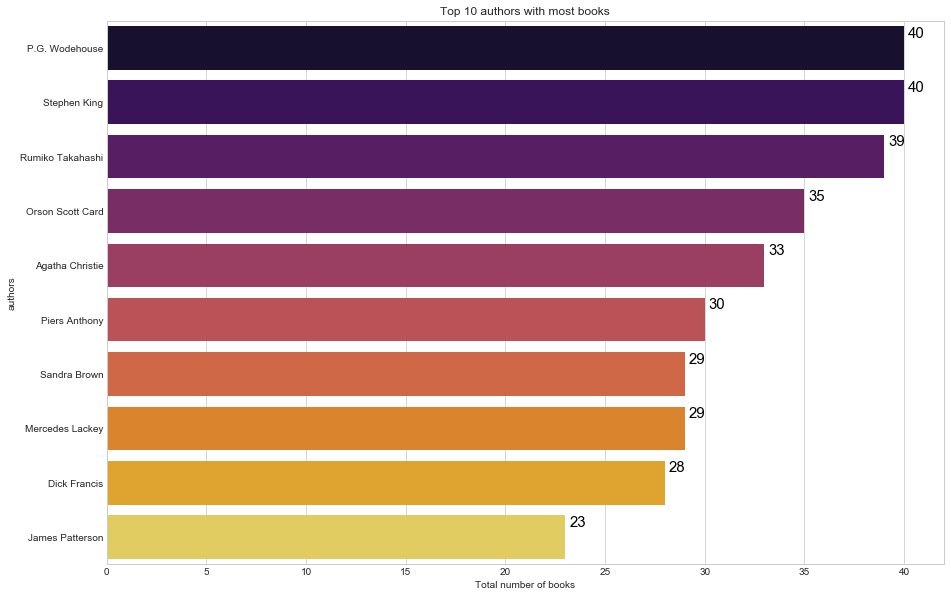

In [13]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

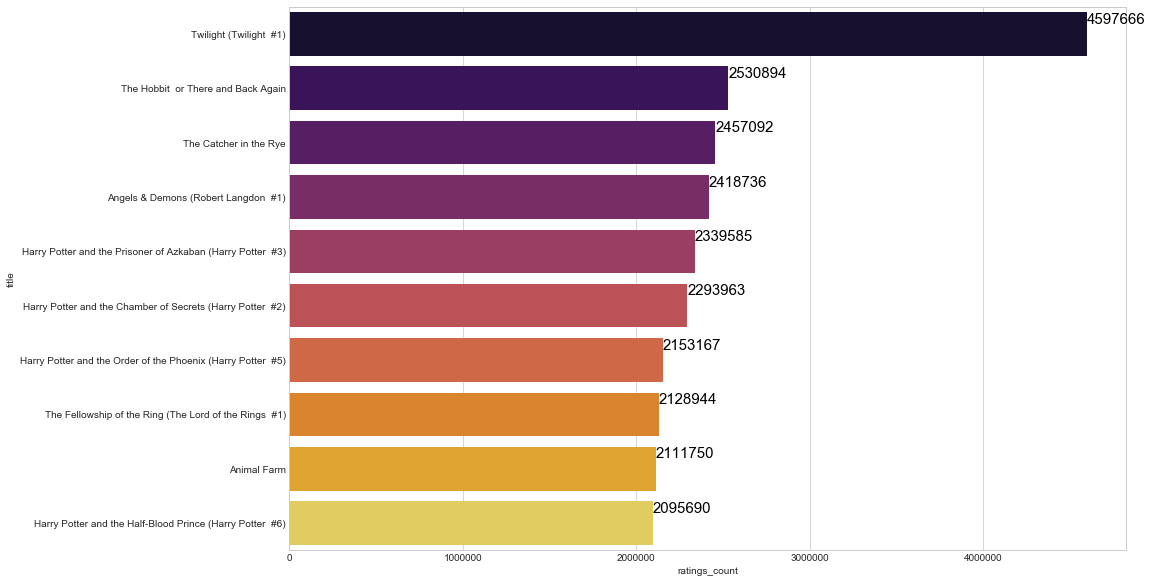

In [14]:

most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_rated['ratings_count'], most_rated.index, palette = 'inferno')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

Text(0.5, 0, 'Average rating')

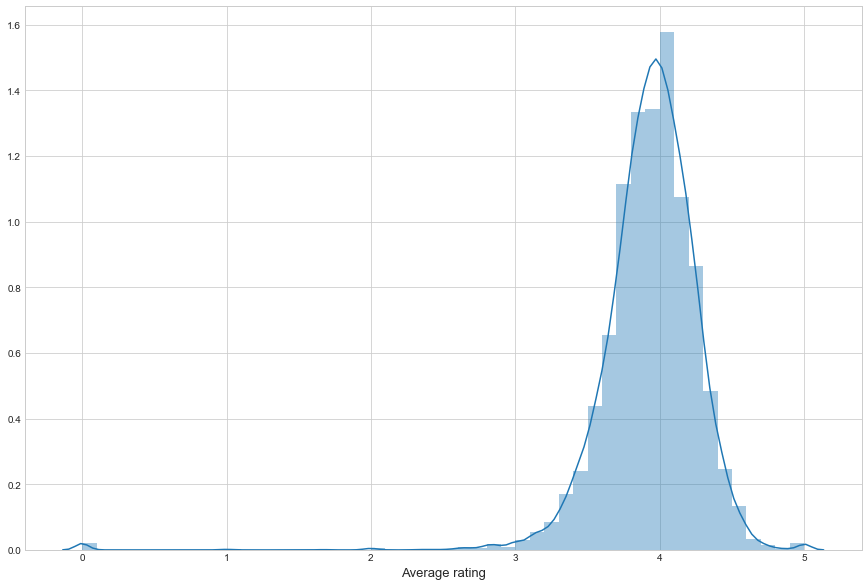

In [15]:
# df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
# ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

In [16]:
df2 = df.copy()

In [17]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [18]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [19]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [21]:
model = neighbors.NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [22]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name
    
BookNames = BookRecommender('The Lord of the Rings: Weapons and Warfare')
BookNames

['The Lord of the Rings: Weapons and Warfare',
 'Corpse: Nature  Forensics  and the Struggle to Pinpoint Time of Death',
 'Naked Empire (Sword of Truth  #8)',
 'What are the Seven Wonders of the World?: And 100 Other Great Cultural Lists—Fully Explicated',
 'Under the Sea Wind (Nature Classic)']